#Notes

*   Scaling in general means converting the column to a common number scale, Standard scaling in particular converts the column of interest by transforming it to a range of numbers with mean = 0 and standard deviation = 1.

*   We need to scale the numeric columns because they have different values with high difference between themm. So we need to bring them to a much small range so that model would fit better.

*   Also we are using smote algorithm which in turn uses a distance based sampling , if the distance would be larger and larger then the new sample points may be inaccurate and more divergent.

In [1]:
!pip install pandas

In [2]:
!pip install seaborn

In [3]:
!pip install scikit-learn matplotlib

In [4]:
!pip install imbalanced-learn


In [5]:
!pip install xgboost


In [6]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import joblib
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTEENN

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

#Just playing

In [8]:
import pandas as pd
df = pd.read_csv("/content/churn dataset.csv")
# print(df)
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")


print(f"Numer of shape:\n{df.describe()}")
print(f"\n\n")
print(f"Numer of columns:\n{df.columns}")

df.drop(["customerID"],axis=1,inplace=True)
print(f"\n\n")
print(f"Numer of columns:\n{df.columns}")


Number of rows: 7043
Number of columns: 21
Numer of shape:
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000



Numer of columns:
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')



Numer of columns:
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
col = []
col_with_binary = []
for col_name in df.columns:
    unique_list = df[col_name].unique()
    if(len(unique_list)==2):
      col.append(f"column: {col_name} - {unique_list}")
      col_with_binary.append(col_name)

for i in col:
  print(f"{i}\n")
for i in col_with_binary:
  print(f"{i}\n")
print(col_with_binary)

column: gender - ['Female' 'Male']

column: SeniorCitizen - [0 1]

column: Partner - ['Yes' 'No']

column: Dependents - ['No' 'Yes']

column: PhoneService - ['No' 'Yes']

column: PaperlessBilling - ['Yes' 'No']

column: Churn - ['No' 'Yes']

gender

SeniorCitizen

Partner

Dependents

PhoneService

PaperlessBilling

Churn

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


# **Detecting anomalies in dataset**



Class imbalance test

In [11]:
## Simple we will get the ratio of churned customer to unchurned customer
# ischurn=0
# notchurn=0
# for row in df.columns:
#   if(df[col])

counts = df['Churn'].value_counts(normalize=True)
print(counts) # The result shows we have imbalance in this dataset -  will fix thi in next section

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


/tmp/ipython-input-4226702516.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='viridis')


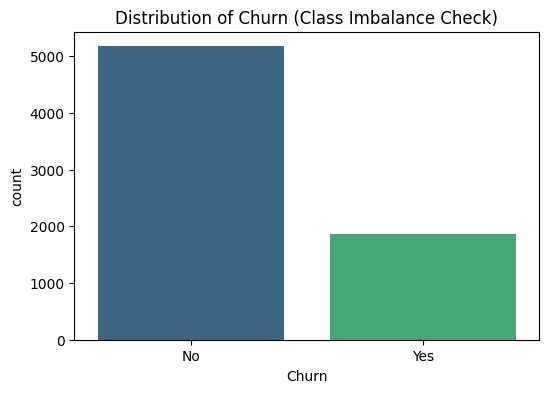

In [12]:
# Plot to check imbalance
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='viridis')
plt.title('Distribution of Churn (Class Imbalance Check)')
plt.show()

Some noisy data or redundant - if any unsual values seen in describe().


What does heatmap do- first make a correlation matrix of numeic data , this will have how much of a feature depends on other feature.(**Must include the target column in integer only**).


If you see two features with a correlation of 1.0, they are perfectly redundant. If you see a feature that has 0.0 correlation with, it might be "noise" that isn't helping your model predict anything.

In [13]:
def Binary_Numeric_column(df):
  mapdict = {"No":0,"Yes":1 , "Female":0,"Male":1, 0:0,1:1}
  df_copy_new = df.copy()
  print(f"Inside Binary wala")
  for col in col_with_binary:
    df_copy_new[col] = df_copy_new[col].map(mapdict)
  return df_copy_new


def OneHotEncode(df):
  return pd.get_dummies(df,drop_first=True,dtype=int)

Inside Binary wala


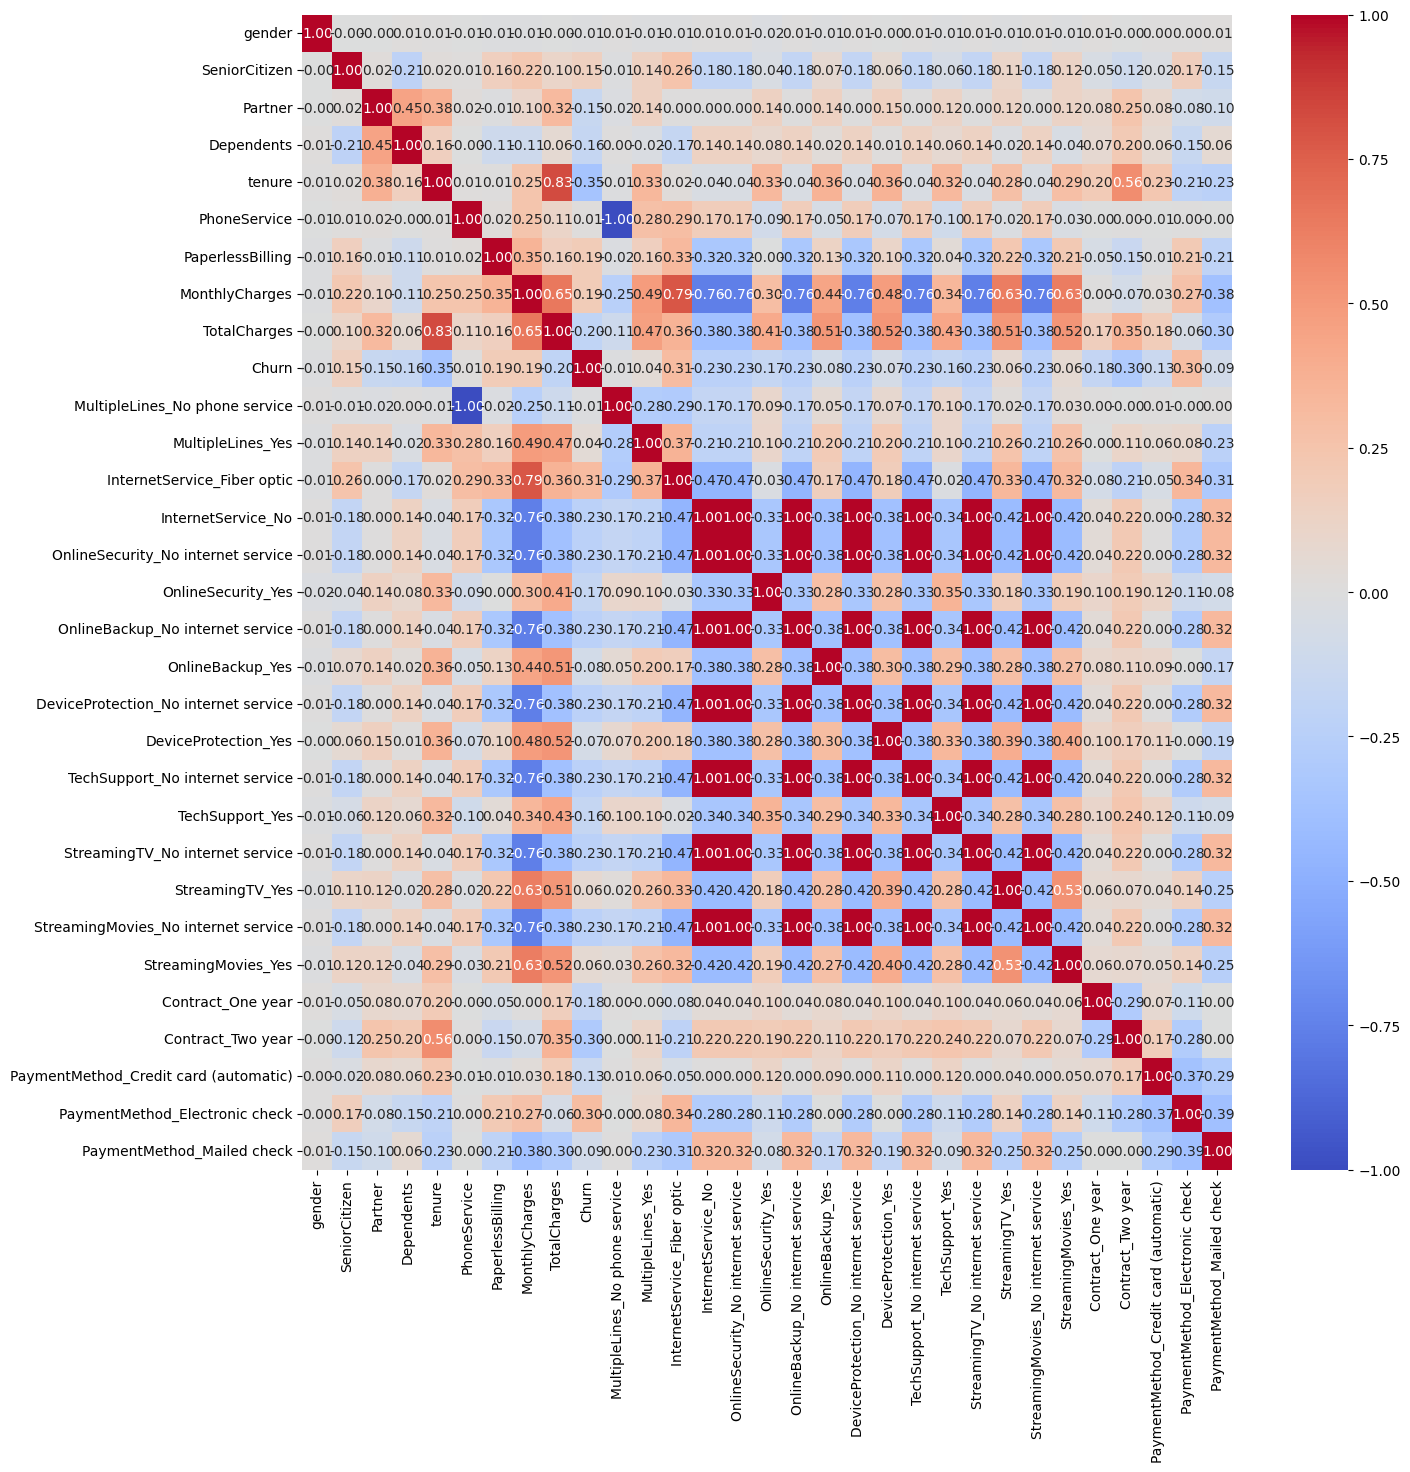

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Then we need to one hot encode the remainign column except the customer_id column in order to get numeric data from them
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"],errors="coerce").fillna(0)

df_copy = Binary_Numeric_column(df)
df_copy_encoded = OneHotEncode(df_copy)

# print(f"FINAL DF ENCODED \n {df_copy_encoded.shape}")
# print(f"FINAL DF ENCODED \n {df_copy_encoded.head()}")

# First make correlation matrix
# print(f" Only numbers {df_copy_encoded.select_dtypes(include=["number"])}")

corr_matrix = df_copy_encoded.select_dtypes(include=["number"]).corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True,cmap="coolwarm",fmt="0.2f")
plt.show()

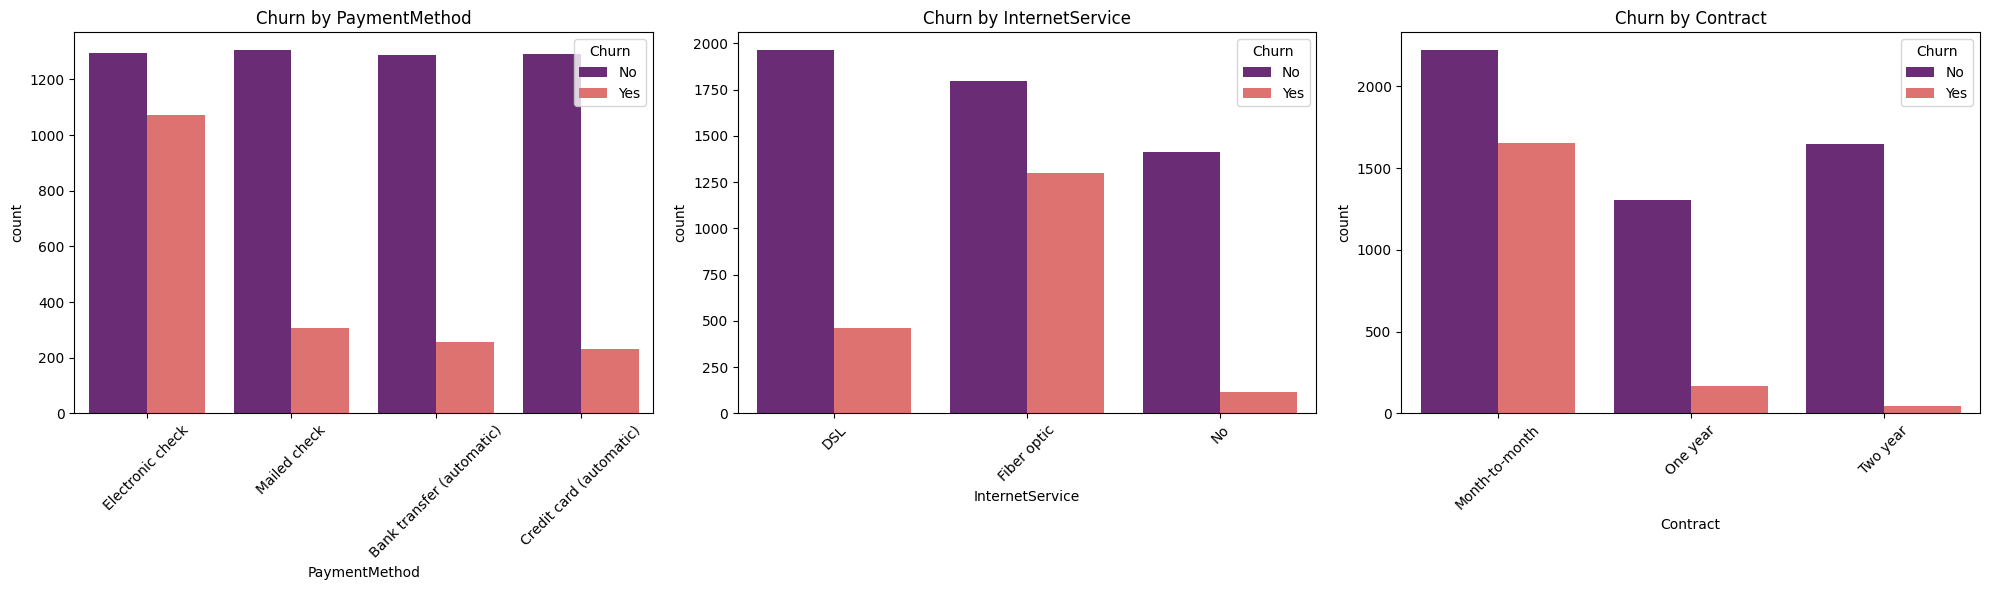

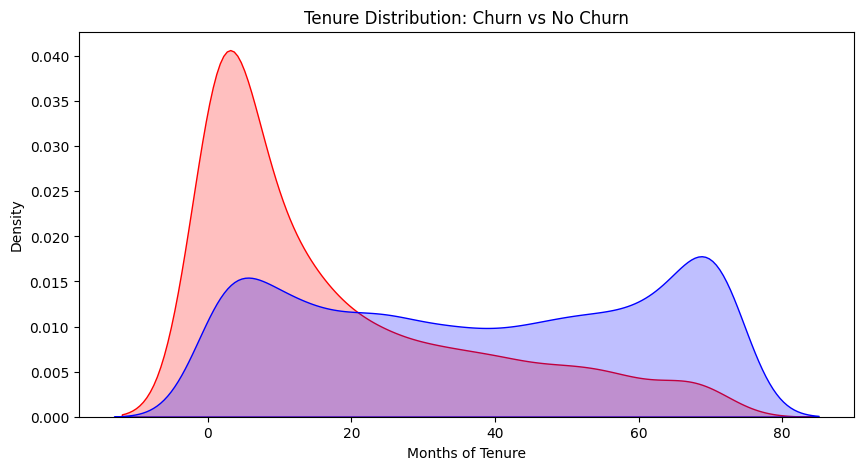

In [15]:
#Plotting imp graphs
features = ['PaymentMethod', 'InternetService', 'Contract']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

for i, col in enumerate(features):
    sns.countplot(x=col, hue='Churn', data=df, ax=axes[i], palette='magma')
    axes[i].set_title(f'Churn by {col}')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.kdeplot(df[df['Churn'] == 'Yes']['tenure'], label='Churn: Yes', fill=True, color='red')
sns.kdeplot(df[df['Churn'] == 'No']['tenure'], label='Churn: No', fill=True, color='blue')
plt.title('Tenure Distribution: Churn vs No Churn')
plt.xlabel('Months of Tenure')
plt.show()

##Starting Smote and Train-Test Split

Note: Apply smote only on the training dataset after splitting, if done before splitting then some synthetic data might be injected into the original dataset.
Thus during the test data will have synthetic data and possibly give good results on this.

In [16]:
df_copy_encoded["Churn"]

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [17]:
def apply_smote(X_train,Y_train):
  smote = SMOTEENN(random_state=42)
  X_train_smote,Y_train_smote = smote.fit_resample(X_train,Y_train)
  return X_train_smote,Y_train_smote

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# df_copy_encoded.drop("TotalCharges",axis=1)
# Make X by removing "churn"
X = df_copy_encoded.drop("Churn",axis=1)
Y = df_copy_encoded["Churn"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

X_train_smote , Y_train_smote = apply_smote(X_train,Y_train)

X_train_smote.shape,Y_train_smote.shape

((4523, 30), (4523,))

#Model Testing

In [19]:
def modelTestUsingLogisticRegression(X_train,X_test,Y_train,Y_test,savethis):
  logistic = LogisticRegression(max_iter=5000)
  logistic.fit(X_train,Y_train)

  y_pred = logistic.predict(X_test)

  print(f"Accuracy: {accuracy_score(Y_test,y_pred)}")
  print(f"Precision: {precision_score(Y_test,y_pred)}")
  print(f"Recall: {recall_score(Y_test,y_pred)}")
  print(f"F1 Score: {f1_score(Y_test,y_pred)}")

  if(savethis):
    joblib.dump(logistic,"logistic_model.joblib")

In [20]:
def modelTestUsingRandomForest(X_train,X_test,Y_train,Y_test,savethis):

  forest = RandomForestClassifier(n_estimators=1000,random_state=42)
  forest.fit(X_train,Y_train)

  y_pred = forest.predict(X_test)

  print(f"Accuracy: {accuracy_score(Y_test,y_pred)}")
  print(f"Precision: {precision_score(Y_test,y_pred)}")
  print(f"Recall: {recall_score(Y_test,y_pred)}")
  print(f"F1 Score: {f1_score(Y_test,y_pred)}")

  if(savethis):
    joblib.dump(forest,"random_forest_model.joblib")

In [21]:
def modelTestUsingGradientBoosting(X_train,X_test,Y_train,Y_test,savethis):
  boost = GradientBoostingClassifier(n_estimators=100,random_state=42)
  boost.fit(X_train,Y_train)

  y_pred = boost.predict(X_test)

  print(f"Accuracy: {accuracy_score(Y_test,y_pred)}")
  print(f"Precision: {precision_score(Y_test,y_pred)}")
  print(f"Recall: {recall_score(Y_test,y_pred)}")
  print(f"F1 Score: {f1_score(Y_test,y_pred)}")
  if(savethis):
    joblib.dump(boost,"gradient_boosting_model.joblib")

In [22]:
def modelTestUsingXGBClassifier(X_train,X_test,Y_train,Y_test,savethis):
  boost = XGBClassifier()
  boost.fit(X_train,Y_train)

  y_pred = boost.predict(X_test)

  print(f"Accuracy: {accuracy_score(Y_test,y_pred)}")
  print(f"Precision: {precision_score(Y_test,y_pred)}")
  print(f"Accuracy: {recall_score(Y_test,y_pred)}")
  print(f"F1 Score: {f1_score(Y_test,y_pred)}")
  if(savethis):
    joblib.dump(boost,"xgboost_model.joblib")

As we can see the accuracy or precision for almost every model is not upto the mark / very low

In [23]:
# Analyse  again
# df_copy_encoded.info()
# df_copy_encoded["TotalCharges"]

# Normalize the totalcharges and monthly charges
scaler = StandardScaler()
huge_cols = ["tenure","TotalCharges","MonthlyCharges"]

# We make new Train and test dataset
X = df_copy_encoded.drop("Churn",axis=1)
Y = df_copy_encoded["Churn"]

X_train_fit, X_test_fit, Y_train_fit, Y_test_fit = train_test_split(X,Y,random_state=42,test_size=0.2)
X_train_fit[huge_cols] = scaler.fit_transform(X_train_fit[huge_cols])
X_test_fit[huge_cols] = scaler.transform(X_test_fit[huge_cols])

X_train_fit,Y_train_fit = apply_smote(X_train_fit,Y_train_fit)

modelTestUsingLogisticRegression(X_train_fit,X_test_fit,Y_train_fit,Y_test_fit,False)

Accuracy: 0.7239176721078779
Precision: 0.4880239520958084
Recall: 0.8739946380697051
F1 Score: 0.6263208453410183


In [28]:
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [29]:
model_columns = list(X_train_fit.columns)
joblib.dump(model_columns, 'model_columns.joblib')

['model_columns.joblib']

In [24]:
modelTestUsingRandomForest(X_train_fit,X_test_fit,Y_train_fit,Y_test_fit,False)

Accuracy: 0.7295954577714692
Precision: 0.49375
Recall: 0.8471849865951743
F1 Score: 0.6238894373149062


In [25]:
modelTestUsingGradientBoosting(X_train_fit,X_test_fit,Y_train_fit,Y_test_fit,False)

Accuracy: 0.7154009936124911
Precision: 0.4797687861271676
Recall: 0.8900804289544236
F1 Score: 0.6234741784037559


In [26]:
modelTestUsingXGBClassifier(X_train_fit,X_test_fit,Y_train_fit,Y_test_fit,False)

Accuracy: 0.7331440738112136
Precision: 0.4976228209191759
Accuracy: 0.8418230563002681
F1 Score: 0.6254980079681275


Best model turns out as XGBOOST having highest recall

In [27]:
model = modelTestUsingGradientBoosting(X_train_fit,X_test_fit,Y_train_fit,Y_test_fit,True)

Accuracy: 0.7154009936124911
Precision: 0.4797687861271676
Recall: 0.8900804289544236
F1 Score: 0.6234741784037559
